# Imports

In [26]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Read the Data

In [27]:
df = pd.read_csv(r"D:\DEPI-Projects\DEPI_AIS2_ml\AMIT\AI & Data Science\src\Data Science\Session_3_Data-PreProcessing\train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Pre-preocessing

### 1- Data Understanding

- As we can see below that **[PassengerId, Name, Ticket]**, are not important feature for our problem, so we may like to **drop them**.

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Drop Un-necessary Columns**

In [29]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### 2- Check for Datatypes

- **Display Datatypes**

In [ ]:
dtypes = df.dtypes
n_uniq = df.nunique()
n_uniq
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_Uniqe,2,3,2,88,7,7,248,147,3


- **Change In-correct Datatypes**

In [31]:
cols = ["Pclass", "SibSp", "Parch", "Sex", "Embarked", "Survived"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,category,category,category,float64,category,category,float64,object,category


### 3- Check for Null Values

- **Check for Null Values**

In [32]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


- **Drop Null values in Embarked column**

In [33]:
df = df.dropna(subset=['Embarked'])

- **Drop Cabin column**

In [34]:
df = df.drop("Cabin", axis=1)

- **Replace Null Values in Age column**

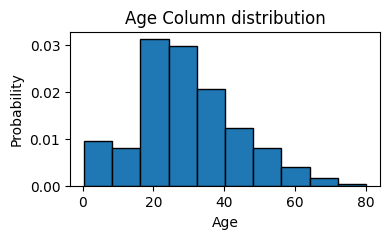

In [35]:
plt.figure(figsize=(4, 2))
plt.hist(df['Age'], density=True, edgecolor="black")
plt.title("Age Column distribution")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()

In [36]:
median = df["Age"].median()
df["Age"].fillna(median, inplace=True)

- **Make sure that Null values are removed**

In [37]:
pd.DataFrame(df.isnull().sum()).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0,0


### 4- Handle Outliers

- **Check for Outliers**

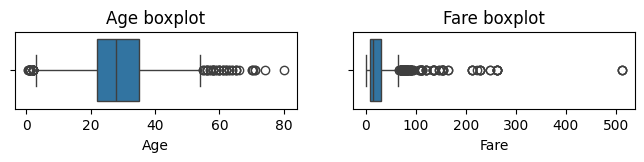

In [38]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

- **Remove Outliers**

In [39]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

- **Make Sure Outliers are removed**

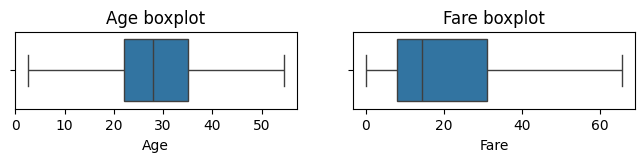

In [40]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

### 5- Visualization

#### A. Data Distribution Graphs

- **Numerical Data Distribution Graphs**

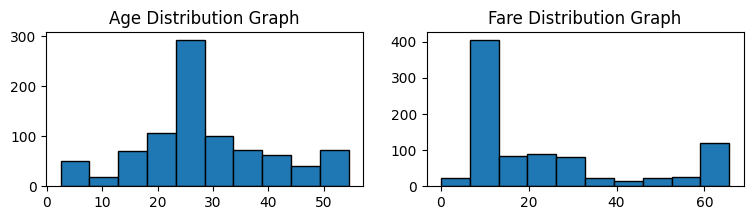

In [41]:
# Histogram
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.show()

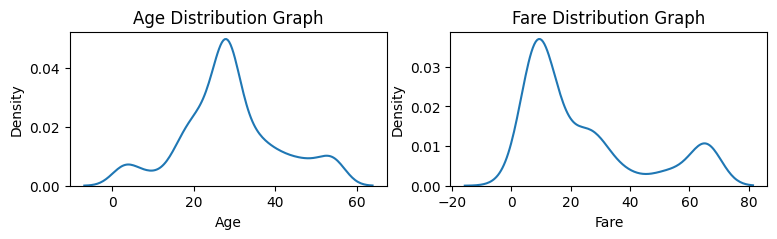

In [42]:
# Kde Plot
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution Graph")
plt.show()

- **Categorical Data Distribution Graphs**

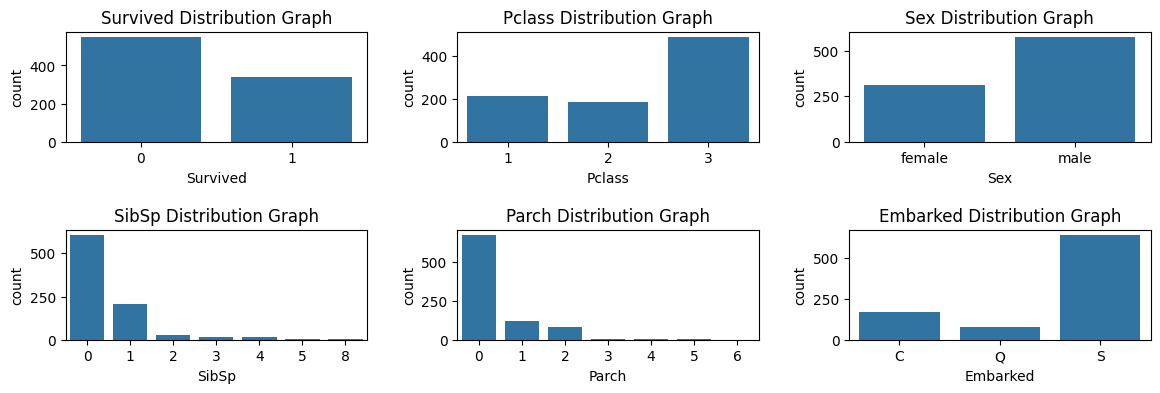

In [43]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

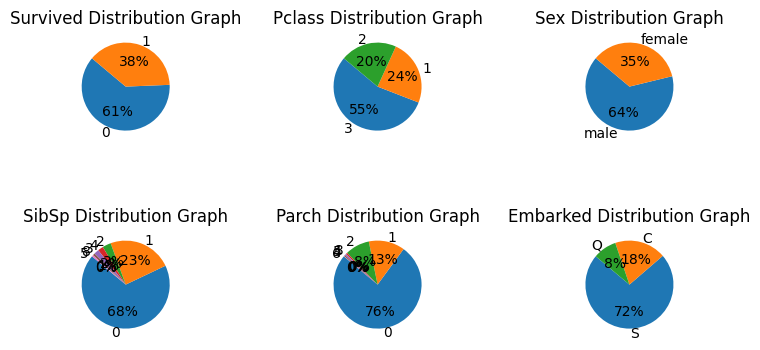

In [44]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

#### B. Outlier Detection Graphs

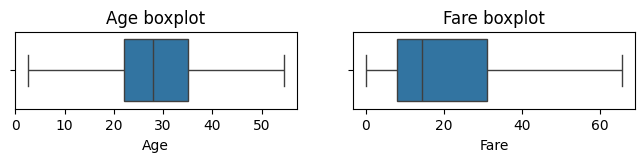

In [45]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

#### C. Relationship Graphs

- **Numerical/Numerical Relationship**

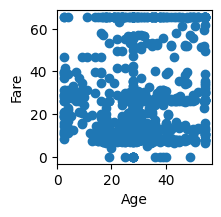

In [46]:
# Scatter Plot
plt.figure(figsize=(2, 2))
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

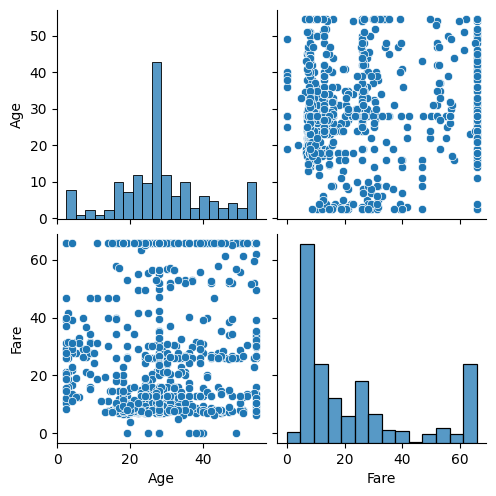

In [47]:
# Pair Plot
sns.pairplot(df)

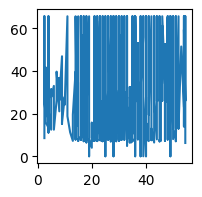

In [48]:
# Line Plot
sorted_df = df.sort_values(by="Age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["Age"], sorted_df["Fare"])
plt.show()

- **Numerical/Categorical Relationship**

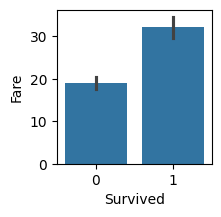

In [49]:
# bar plot
plt.figure(figsize=(2, 2))
sns.barplot(x="Survived", y="Fare", data=df)
plt.show()

- **Categorical/Categorical Relationship**

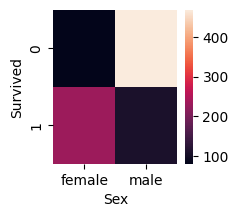

In [50]:
# Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="Survived", columns="Sex", values="Age", aggfunc=len)
sns.heatmap(agg)
plt.show()

### 6- Remove Duplicates 

- **Check for Duplicates**

In [51]:
df.duplicated().sum()

np.int64(129)

- **Remove Duplicates**

In [52]:
df.drop_duplicates(inplace=True)

- **Make Sure that Duplicates are Removed**

In [53]:
df.duplicated().sum()

np.int64(0)

### 7- Data Splitting

In [54]:
X = df.drop("Survived", axis=1)
y = df[["Survived"]]

### 8- Normalization

In [55]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

### 9- Encoding

- **Check for Number of Unique Values**

In [56]:
str_cols = ["Sex", "Embarked"]
pd.DataFrame(X[str_cols].nunique()).T

,Sex,Embarked
0,2,3


- **One Hot Encoder**

In [57]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

In [58]:
X

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.701923,0,5,0.443598,0,0,1
887,1,0,1,0.317308,0,0,0.456925,1,0,0
888,3,0,1,0.490385,1,2,0.357163,1,0,0
889,1,1,0,0.451923,0,0,0.456925,0,1,0
